# Problem 1: Clustering

A leading bank wants to develop a customer segmentation to give promotional offers to its customers. They collected a sample that summarizes the activities of users during the past few months. You are given the task to identify the segments based on credit card usage.

In [39]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()  # for plot styling
%matplotlib inline
from scipy import stats
import seaborn as sns
import scipy.cluster.hierarchy as sch
from scipy.cluster.hierarchy import dendrogram,linkage,fcluster
from sklearn.cluster import AgglomerativeClustering
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from scipy.stats import norm
from scipy.cluster.hierarchy import fcluster

In [40]:
df = pd.read_csv('bank_marketing_part1_Data.csv')
df.head()

,spending,advance_payments,probability_of_full_payment,current_balance,credit_limit,min_payment_amt,max_spent_in_single_shopping
0,19.94,16.92,0.8752,6.675,3.763,3.252,6.550
1,15.99,14.89,0.9064,5.363,3.582,3.336,5.144
2,18.95,16.42,0.8829,6.248,3.755,3.368,6.148
3,10.83,12.96,0.8099,5.278,2.641,5.182,5.185
4,17.99,15.86,0.8992,5.890,3.694,2.068,5.837


In [41]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 210 entries, 0 to 209
Data columns (total 7 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   spending                      210 non-null    float64
 1   advance_payments              210 non-null    float64
 2   probability_of_full_payment   210 non-null    float64
 3   current_balance               210 non-null    float64
 4   credit_limit                  210 non-null    float64
 5   min_payment_amt               210 non-null    float64
 6   max_spent_in_single_shopping  210 non-null    float64
dtypes: float64(7)
memory usage: 11.6 KB


In [42]:
 df.describe()

,spending,advance_payments,probability_of_full_payment,current_balance,credit_limit,min_payment_amt,max_spent_in_single_shopping
count,210.000000,210.000000,210.000000,210.000000,210.000000,210.000000,210.000000
mean,14.847524,14.559286,0.870999,5.628533,3.258605,3.700201,5.408071
std,2.909699,1.305959,0.023629,0.443063,0.377714,1.503557,0.491480
min,10.590000,12.410000,0.808100,4.899000,2.630000,0.765100,4.519000
25%,12.270000,13.450000,0.856900,5.262250,2.944000,2.561500,5.045000
50%,14.355000,14.320000,0.873450,5.523500,3.237000,3.599000,5.223000
75%,17.305000,15.715000,0.887775,5.979750,3.561750,4.768750,5.877000
max,21.180000,17.250000,0.918300,6.675000,4.033000,8.456000,6.550000


In [43]:
df.shape


(210, 7)

In [44]:
df.duplicated().sum()

0

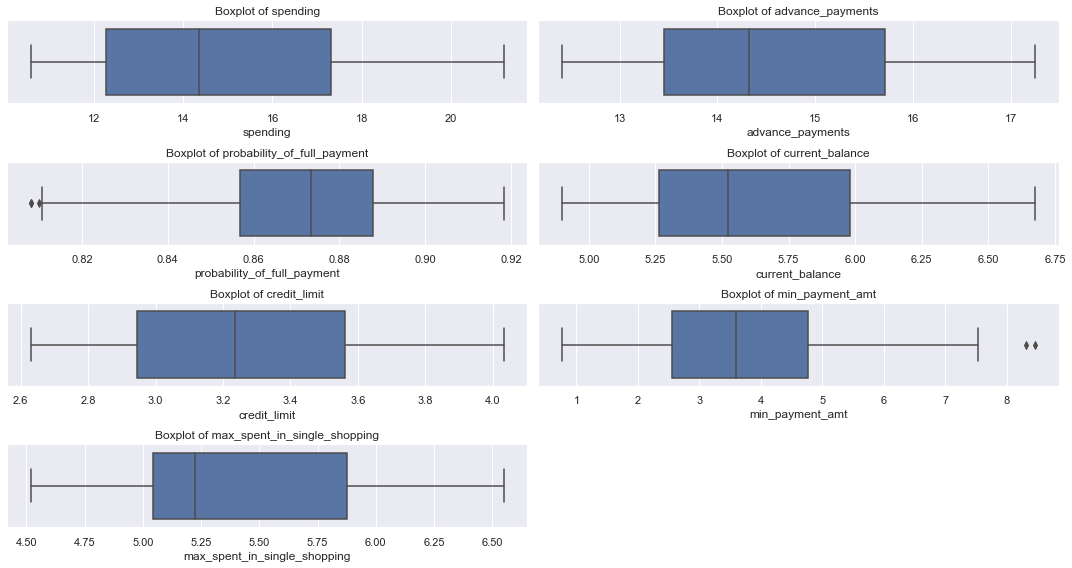

In [45]:
# plt.title('spending')
# sns.boxplot(df['spending'],orient='horizontal',color='orange')
# sns.boxplot(df['advance_payments'],orient='horizontal',color='orange')
plt.figure(figsize = (15,8))
feature_list = df.columns
for i in range(len(feature_list)):
    plt.subplot(4,2,i+1)
    sns.boxplot(x=df[feature_list[i]], data=df, orient='h', color='b')
    plt.title('Boxplot of {}'.format(feature_list[i]))
    plt.tight_layout()

C:\Users\rmand\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\rmand\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\rmand\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-lev

<function matplotlib.pyplot.show(close=None, block=None)>

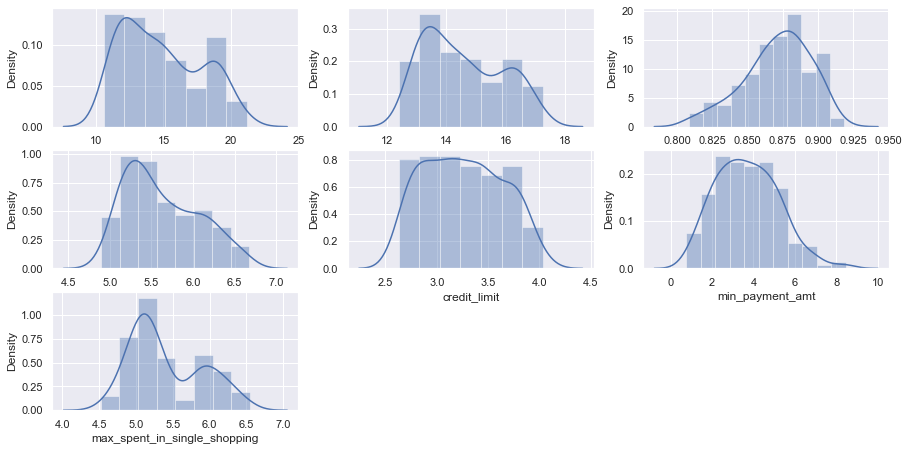

In [46]:
plt.figure(figsize=(15,10))
for i, column in enumerate(df.columns, 1):
    plt.subplot(4,3,i)
    sns.distplot(df[column])
plt.show

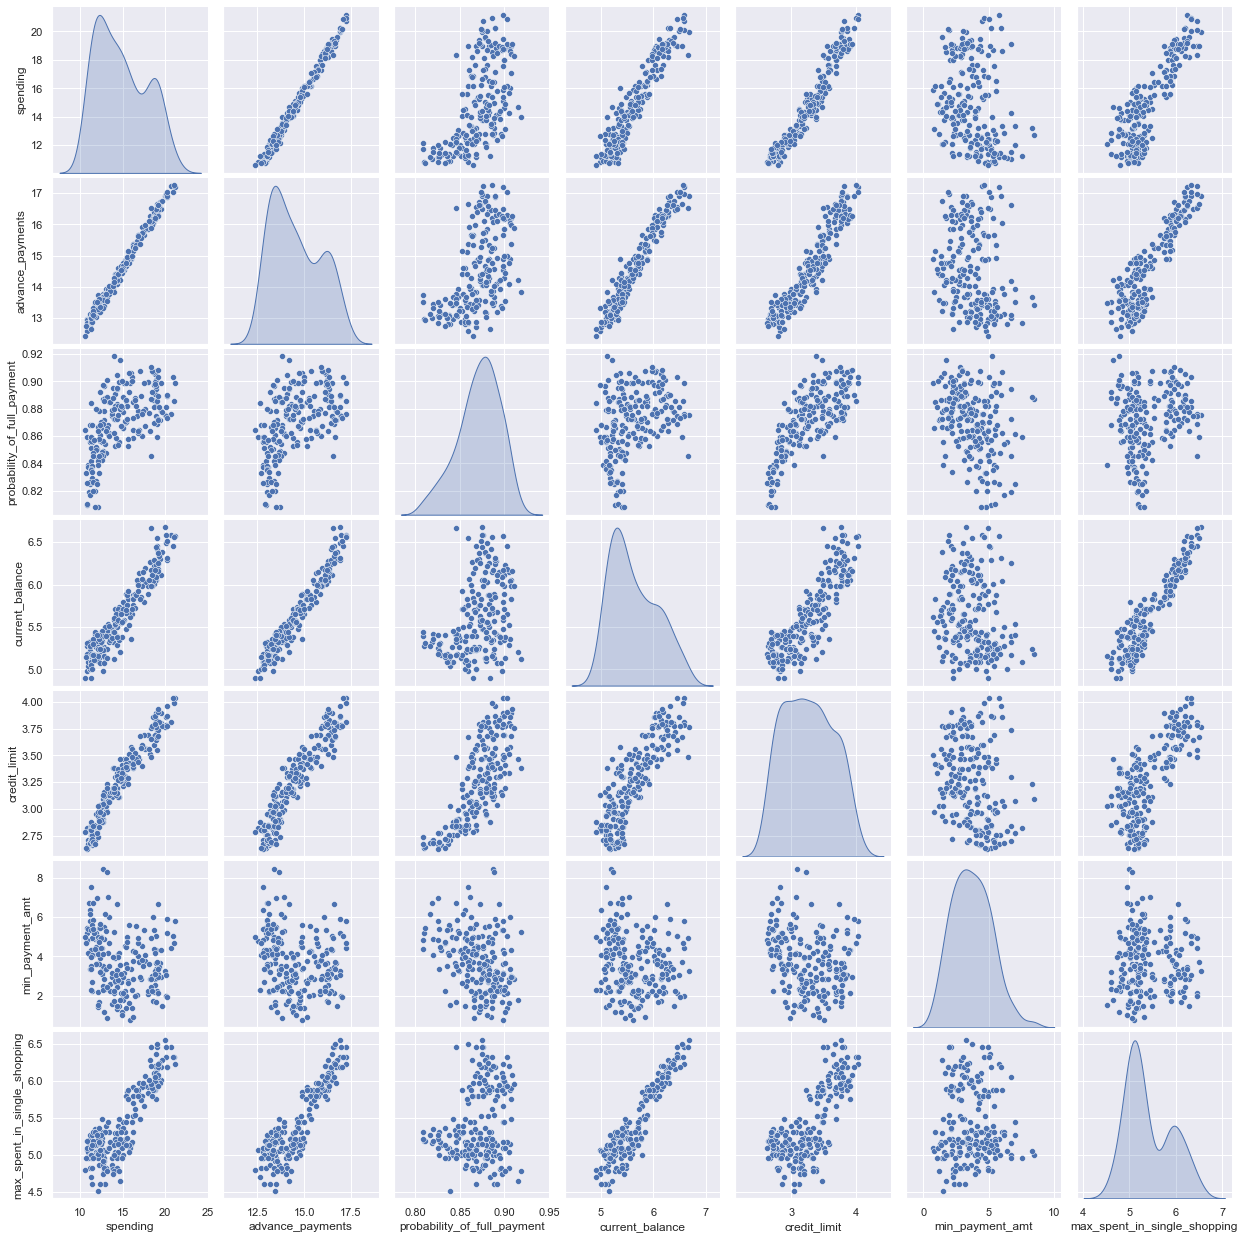

In [47]:
sns.pairplot(df,diag_kind='kde');

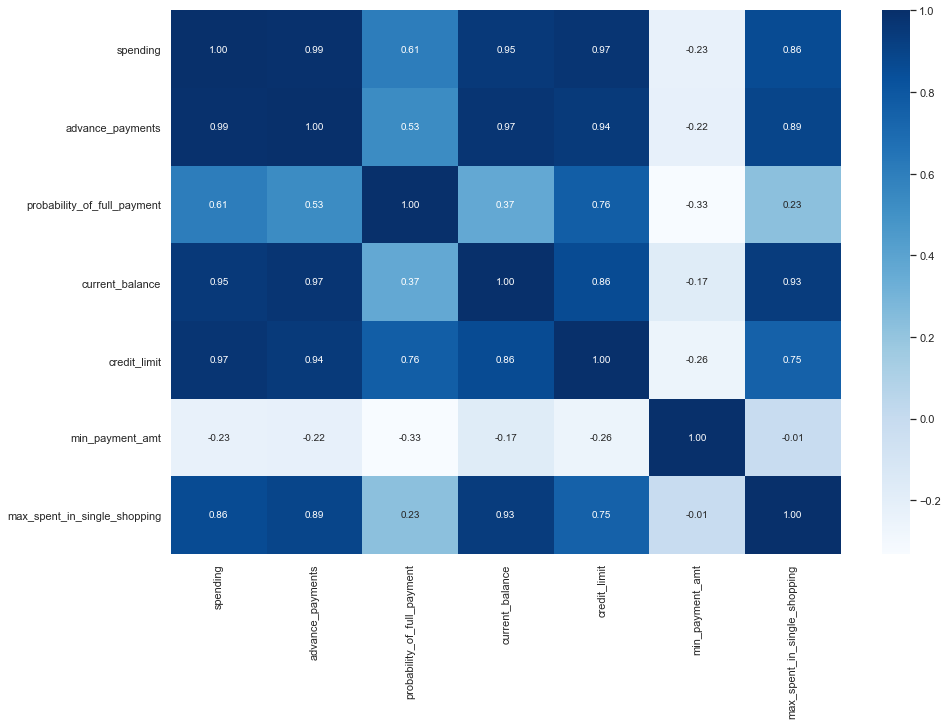

In [48]:
plt.figure(figsize=(15,10))
sns.heatmap(df.corr(),annot=True,fmt='.2f', cmap='Blues')
plt.show()

In [49]:

# 1.2 Do you think scaling is necessary for clustering in this case? Justify 2

In [50]:
df.var()

spending                        8.466351
advance_payments                1.705528
probability_of_full_payment     0.000558
current_balance                 0.196305
credit_limit                    0.142668
min_payment_amt                 2.260684
max_spent_in_single_shopping    0.241553
dtype: float64

In [51]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()

In [52]:
scaled_df = sc.fit_transform(df)
scaled_df

array([[ 1.75435461,  1.81196782,  0.17822987, ...,  1.33857863,
        -0.29880602,  2.3289982 ],
       [ 0.39358228,  0.25383997,  1.501773  , ...,  0.85823561,
        -0.24280501, -0.53858174],
       [ 1.41330028,  1.42819249,  0.50487353, ...,  1.317348  ,
        -0.22147129,  1.50910692],
       ...,
       [-0.2816364 , -0.30647202,  0.36488339, ..., -0.15287318,
        -1.3221578 , -0.83023461],
       [ 0.43836719,  0.33827054,  1.23027698, ...,  0.60081421,
        -0.95348449,  0.07123789],
       [ 0.24889256,  0.45340314, -0.77624835, ..., -0.07325831,
        -0.70681338,  0.96047321]])

In [53]:
scaled_df1 = pd.DataFrame(scaled_df, index=df.index, columns=df.columns)
scaled_df1.head()

,spending,advance_payments,probability_of_full_payment,current_balance,credit_limit,min_payment_amt,max_spent_in_single_shopping
0,1.754355,1.811968,0.178230,2.367533,1.338579,-0.298806,2.328998
1,0.393582,0.253840,1.501773,-0.600744,0.858236,-0.242805,-0.538582
2,1.413300,1.428192,0.504874,1.401485,1.317348,-0.221471,1.509107
3,-1.384034,-1.227533,-2.591878,-0.793049,-1.639017,0.987884,-0.454961
4,1.082581,0.998364,1.196340,0.591544,1.155464,-1.088154,0.874813


In [54]:
# 1.3 from scipy.cluster.hierarchy import dendrogram, linkage

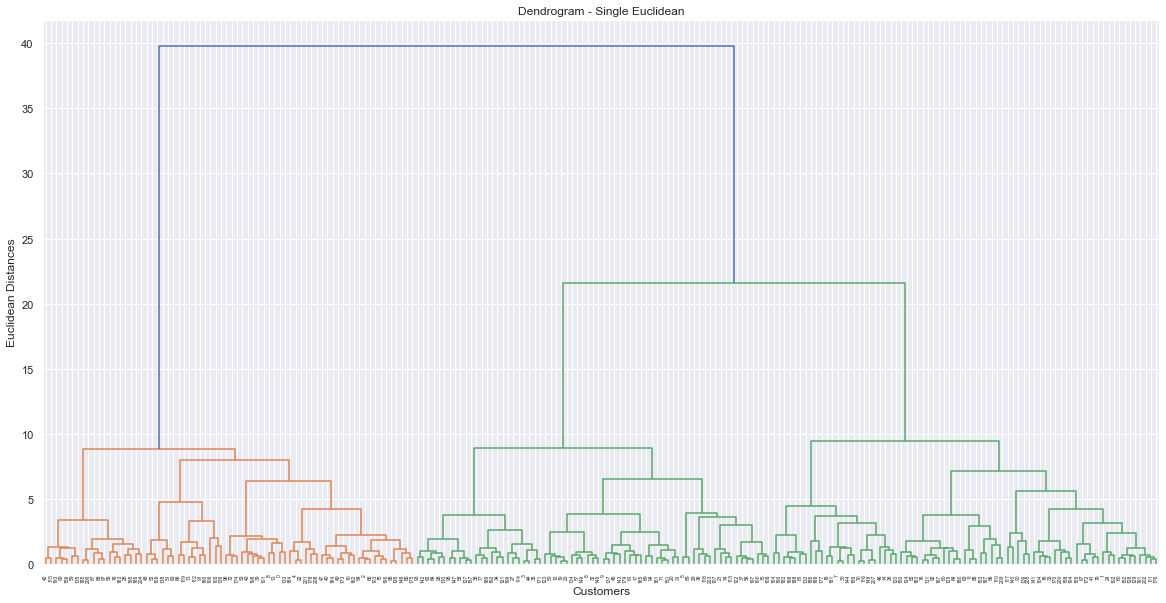

In [55]:
plt.figure(figsize=(20,10))
wardlink = linkage(scaled_df1, method = 'ward')
plt.title('Dendrogram - Single Euclidean')
plt.xlabel('Customers')
plt.ylabel('Euclidean Distances')
dend = dendrogram(wardlink,
                 leaf_rotation=90,
                 labels=scaled_df1.index
                  )


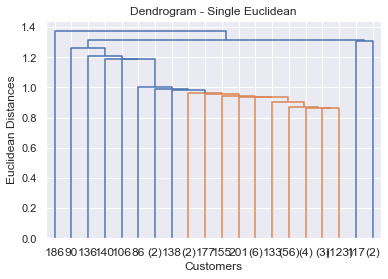

In [56]:
# Dendrogram single euclidean
link1 = linkage(scaled_df1, method='single', metric='euclidean')
dend1 = dendrogram(link1 ,truncate_mode='lastp', p=20)
plt.title('Dendrogram - Single Euclidean')
plt.xlabel('Customers')
plt.ylabel('Euclidean Distances')
plt.show();

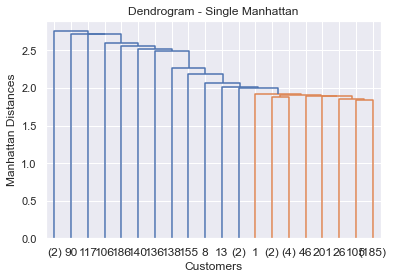

In [57]:
link2 = linkage(scaled_df, method='single', metric='cityblock')
dend2 = dendrogram(link2,truncate_mode='lastp', p=20)
plt.title('Dendrogram - Single Manhattan')
plt.xlabel('Customers')
plt.ylabel('Manhattan Distances')
plt.show();

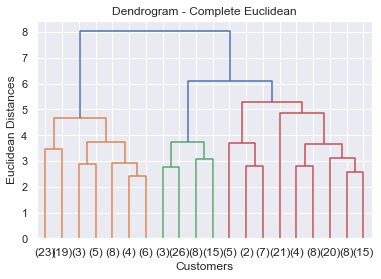

In [58]:
link3 = linkage(scaled_df, method='complete', metric='euclidean')
dend3 = dendrogram(link3,truncate_mode='lastp', p=20)
plt.title('Dendrogram - Complete Euclidean')
plt.xlabel('Customers')
plt.ylabel('Euclidean Distances')
plt.show();

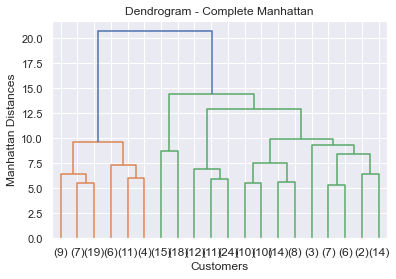

In [59]:
link4 = linkage(scaled_df, method='complete', metric='cityblock')
dend4 = dendrogram(link4,truncate_mode='lastp', p=20)
plt.title('Dendrogram - Complete Manhattan')
plt.xlabel('Customers')
plt.ylabel('Manhattan Distances')
plt.show();

Text(0, 0.5, 'Euclidean Distances')

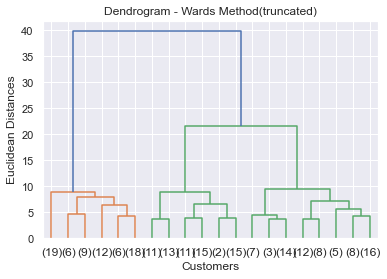

In [60]:
# Truncated ward methid dendrogram
dend = dendrogram(wardlink, truncate_mode='lastp', p=20)
plt.title('Dendrogram - Wards Method(truncated)')
plt.xlabel('Customers')
plt.ylabel('Euclidean Distances')

In [61]:
clusters = fcluster(wardlink, t=3, criterion='maxclust')
clusters

array([1, 3, 1, 2, 1, 2, 2, 3, 1, 2, 1, 3, 2, 1, 3, 2, 3, 2, 3, 2, 2, 2,
       1, 2, 3, 1, 3, 2, 2, 2, 3, 2, 2, 3, 2, 2, 2, 2, 2, 1, 1, 3, 1, 1,
       2, 2, 3, 1, 1, 1, 2, 1, 1, 1, 1, 1, 2, 2, 2, 1, 3, 2, 2, 3, 3, 1,
       1, 3, 1, 2, 3, 2, 1, 1, 2, 1, 3, 2, 1, 3, 3, 3, 3, 1, 2, 3, 3, 1,
       1, 2, 3, 1, 3, 2, 2, 1, 1, 1, 2, 1, 2, 1, 3, 1, 3, 1, 1, 2, 2, 1,
       3, 3, 1, 2, 2, 1, 3, 3, 2, 1, 3, 2, 2, 2, 3, 3, 1, 2, 3, 3, 2, 3,
       3, 1, 2, 1, 1, 2, 1, 3, 3, 3, 2, 2, 3, 2, 1, 2, 3, 2, 3, 2, 3, 3,
       3, 3, 3, 2, 3, 1, 1, 2, 1, 1, 1, 2, 1, 3, 3, 3, 3, 2, 3, 1, 1, 1,
       3, 3, 1, 2, 3, 3, 3, 3, 1, 1, 3, 3, 3, 2, 3, 3, 2, 1, 3, 1, 1, 2,
       1, 2, 3, 1, 3, 2, 1, 3, 1, 3, 1, 3], dtype=int32)

In [62]:
scaled_df1['clusters'] = clusters #Adding the  weitage clusters column wise for all the values

In [63]:
scaled_df1.head()


,spending,advance_payments,probability_of_full_payment,current_balance,credit_limit,min_payment_amt,max_spent_in_single_shopping,clusters
0,1.754355,1.811968,0.178230,2.367533,1.338579,-0.298806,2.328998,1
1,0.393582,0.253840,1.501773,-0.600744,0.858236,-0.242805,-0.538582,3
2,1.413300,1.428192,0.504874,1.401485,1.317348,-0.221471,1.509107,1
3,-1.384034,-1.227533,-2.591878,-0.793049,-1.639017,0.987884,-0.454961,2
4,1.082581,0.998364,1.196340,0.591544,1.155464,-1.088154,0.874813,1


In [64]:
# Each Cluster profile with the frequency of each clusters showing in the last column
aggdata = scaled_df1.iloc[:,0:8].groupby('clusters').mean()
aggdata['frequency'] = scaled_df1.clusters.value_counts().sort_index()
aggdata

,spending,advance_payments,probability_of_full_payment,current_balance,credit_limit,min_payment_amt,max_spent_in_single_shopping,frequency
clusters,,,,,,,,
1,1.213983,1.217445,0.568505,1.198256,1.130594,-0.040697,1.242686,70
2,-1.024932,-0.999559,-0.972589,-0.881418,-1.088249,0.832836,-0.583025,67
3,-0.223402,-0.250010,0.347508,-0.340041,-0.085328,-0.725360,-0.656511,73


In [65]:
# Hierchical Clusters Scatterplot


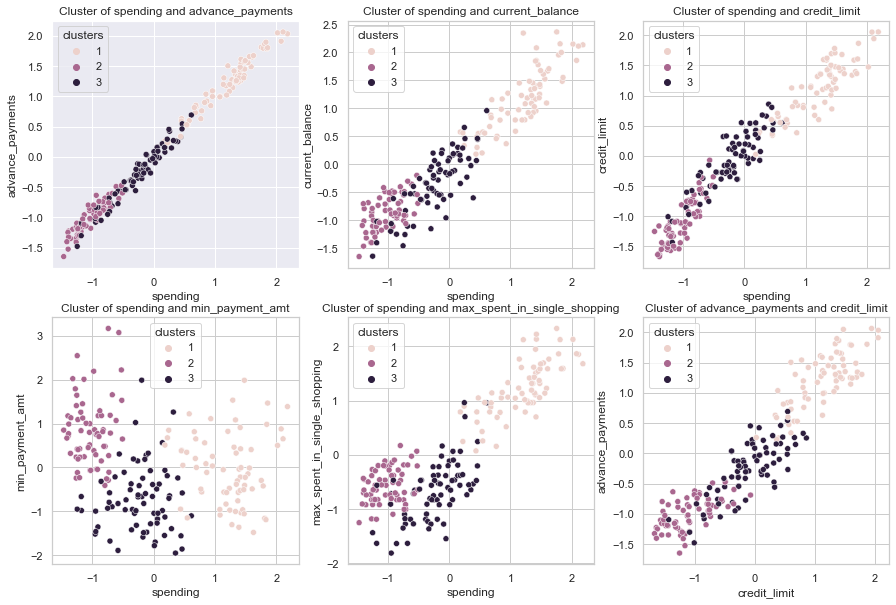

In [66]:
plt.figure(figsize=(15,10))

plt.subplot(2,3,1)
sns.scatterplot(y='advance_payments', x='spending', hue='clusters', data=scaled_df1)
sns.set_style('whitegrid')
sns.set_palette('bright')
plt.title('Cluster of spending and advance_payments')

plt.subplot(2,3,2)
sns.scatterplot(y='current_balance', x='spending', hue='clusters', data=scaled_df1)
sns.set_style('whitegrid')
sns.set_palette('bright')
plt.title('Cluster of spending and current_balance')

plt.subplot(2,3,3)
sns.scatterplot(y='credit_limit', x='spending', hue='clusters', data=scaled_df1)
sns.set_style('whitegrid')
sns.set_palette('bright')
plt.title('Cluster of spending and credit_limit');

plt.subplot(2,3,4)
sns.scatterplot(y='min_payment_amt', x='spending', hue='clusters', data=scaled_df1)
sns.set_style('whitegrid')
sns.set_palette('bright')
plt.title('Cluster of spending and min_payment_amt');

plt.subplot(2,3,5)
sns.scatterplot(y='max_spent_in_single_shopping', x='spending', hue='clusters', data=scaled_df1)
sns.set_style('whitegrid')
sns.set_palette('bright')
plt.title('Cluster of spending and max_spent_in_single_shopping');

plt.subplot(2,3,6)
sns.scatterplot(y='advance_payments', x='credit_limit', hue='clusters', data=scaled_df1)
sns.set_style('whitegrid')
sns.set_palette('bright')
plt.title('Cluster of advance_payments and credit_limit');

In [67]:
# 1.4 K-Means Clustering 

C:\Users\rmand\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:881: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\rmand\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


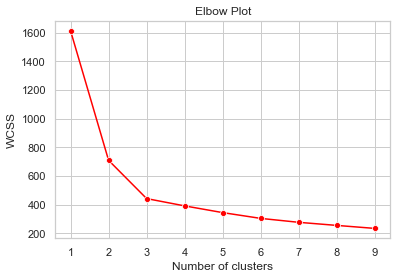

In [68]:
wcss = []
for i in range(1,10):
    kmeans = KMeans(n_clusters = i, init = 'k-means++', random_state =10)
    kmeans.fit(scaled_df1)
# inertia method returns wcss for that model
    wcss.append(kmeans.inertia_)
sns.lineplot(range(1,10), wcss,marker='o',color='red')
plt.title('Elbow Plot')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()


In [69]:
# Cluster evaluation for 3 clusters: The Silhouette score
ss={1:0}
for i in range(2,10):
    clusterer = KMeans(n_clusters = i, init = 'k-means++', random_state =44)
    y=clusterer.fit_predict(scaled_df1)
    # The higher (up to 1) the better
    s =silhouette_score(scaled_df1, y )
    ss[i]=round(s,5)
    print("The Average Silhouette Score for {} clusters is {}".format(i,round(s,5)))


The Average Silhouette Score for 2 clusters is 0.49676
The Average Silhouette Score for 3 clusters is 0.45186
The Average Silhouette Score for 4 clusters is 0.36759
The Average Silhouette Score for 5 clusters is 0.29722
The Average Silhouette Score for 6 clusters is 0.26427
The Average Silhouette Score for 7 clusters is 0.26159
The Average Silhouette Score for 8 clusters is 0.26874
The Average Silhouette Score for 9 clusters is 0.26313


C:\Users\rmand\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


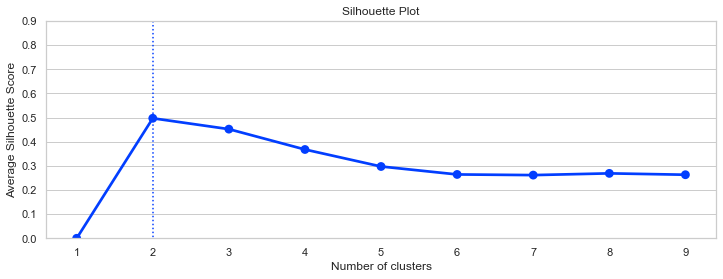

In [70]:
maxkey= [key for key, value in ss.items() if value == max(ss.values())][0]
fig,ax = plt.subplots(figsize=(12,4))
sns.pointplot(list(ss.keys()),list(ss.values()))
plt.vlines(x=maxkey-1,ymax=0,ymin=0.90,linestyles='dotted')
ax.set(ylim=(0, 0.90))
ax.set_title('Silhouette Plot')
ax.set_xlabel('Number of clusters')
ax.set_ylabel('Average Silhouette Score')
plt.show()


In [71]:
# Cluster frequency
k_means = KMeans(n_clusters = 3,random_state=1)
k_means.fit(scaled_df1)
k_means.labels_

k_means3 = KMeans(n_clusters = 3)
k_means3.fit(scaled_df)
k_means3.inertia_

labels = k_means3.labels_
df_kmeans['k_clusters'] = k_means3.labels_
df_kmeans = scaled_df1
df_kmeans['k_clusters'].value_counts().sort_index()

NameError: name 'df_kmeans' is not defined

In [37]:
df_kmeans['k_clusters'] = k_means3.labels_
df_kmeans.drop('clusters',axis=1, inplace=True)
# to remove the clusters from the dataframe.
df_kmeans.head()

NameError: name 'df_kmeans' is not defined

Cluster profile


In [64]:
aggdata_kmeans = df_kmeans.iloc[:,0:8].groupby('k_clusters').mean()
aggdata_kmeans['frequency'] = df_kmeans.k_clusters.value_counts().sort_index()
aggdata_kmeans

,spending,advance_payments,probability_of_full_payment,current_balance,credit_limit,min_payment_amt,max_spent_in_single_shopping,frequency
k_clusters,,,,,,,,
0,-1.030253,-1.006649,-0.964905,-0.897685,-1.085583,0.694804,-0.624809,72
1,1.256682,1.261966,0.560464,1.237883,1.164852,-0.045219,1.292308,67
2,-0.141119,-0.170043,0.449606,-0.257814,0.001647,-0.661919,-0.585893,71


In [224]:
# WSS scores keep reducing as we increase the number of clusters
# Calculating WSS for other values of K - Elbow Method
wss = []
for i in range(1,11):
    KM = KMeans(n_clusters=i)
    KM.fit(scaled_df)
    wss.append(KM.inertia_)
wss

C:\Users\rmand\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:881: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


[1469.9999999999995,
 659.1717544870411,
 430.65897315130064,
 371.38509060801107,
 327.0510614531657,
 290.1034759156124,
 265.8065121386725,
 245.06913618849228,
 225.16666685375478,
 212.36896604963718]

K-Means Clusters Scatterplot


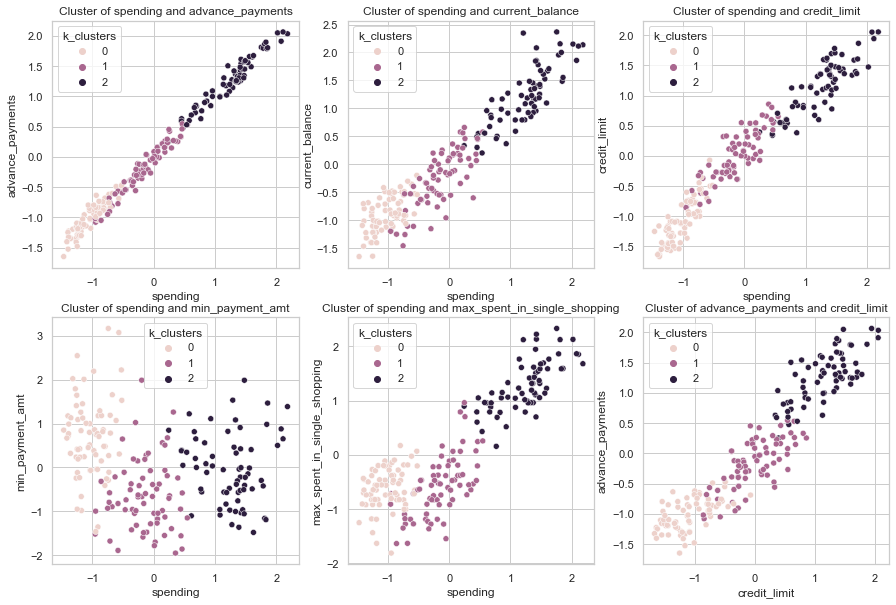

In [241]:
plt.figure(figsize=(15,10))

plt.subplot(2,3,1)
sns.scatterplot(y='advance_payments', x='spending', hue='k_clusters', data=df_kmeans)
sns.set_style('whitegrid')
sns.set_palette('bright')
plt.title('Cluster of spending and advance_payments')

plt.subplot(2,3,2)
sns.scatterplot(y='current_balance', x='spending', hue='k_clusters', data=df_kmeans)
sns.set_style('whitegrid')
sns.set_palette('bright')
plt.title('Cluster of spending and current_balance')

plt.subplot(2,3,3)
sns.scatterplot(y='credit_limit', x='spending', hue='k_clusters', data=df_kmeans)
sns.set_style('whitegrid')
sns.set_palette('bright')
plt.title('Cluster of spending and credit_limit');

plt.subplot(2,3,4)
sns.scatterplot(y='min_payment_amt', x='spending', hue='k_clusters', data=df_kmeans)
sns.set_style('whitegrid')
sns.set_palette('bright')
plt.title('Cluster of spending and min_payment_amt');

plt.subplot(2,3,5)
sns.scatterplot(y='max_spent_in_single_shopping', x='spending', hue='k_clusters', data=df_kmeans)
sns.set_style('whitegrid')
sns.set_palette('bright')
plt.title('Cluster of spending and max_spent_in_single_shopping');

plt.subplot(2,3,6)
sns.scatterplot(y='advance_payments', x='credit_limit', hue='k_clusters', data=df_kmeans)
sns.set_style('whitegrid')
sns.set_palette('bright')
plt.title('Cluster of advance_payments and credit_limit');


 Problem 2 Classification-Problem-DT-RF-and-ANN

In [72]:
DF2=pd.read_csv('insurance_part2_data.csv')
DF2.head()

,Age,Agency_Code,Type,Claimed,Commision,Channel,Duration,Sales,Product Name,Destination
0,48,C2B,Airlines,No,0.70,Online,7,2.51,Customised Plan,ASIA
1,36,EPX,Travel Agency,No,0.00,Online,34,20.00,Customised Plan,ASIA
2,39,CWT,Travel Agency,No,5.94,Online,3,9.90,Customised Plan,Americas
3,36,EPX,Travel Agency,No,0.00,Online,4,26.00,Cancellation Plan,ASIA
4,33,JZI,Airlines,No,6.30,Online,53,18.00,Bronze Plan,ASIA


In [73]:
DF2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3000 entries, 0 to 2999
Data columns (total 10 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Age           3000 non-null   int64  
 1   Agency_Code   3000 non-null   object 
 2   Type          3000 non-null   object 
 3   Claimed       3000 non-null   object 
 4   Commision     3000 non-null   float64
 5   Channel       3000 non-null   object 
 6   Duration      3000 non-null   int64  
 7   Sales         3000 non-null   float64
 8   Product Name  3000 non-null   object 
 9   Destination   3000 non-null   object 
dtypes: float64(2), int64(2), object(6)
memory usage: 234.5+ KB


In [74]:
DF2.isna().sum() 

Age             0
Agency_Code     0
Type            0
Claimed         0
Commision       0
Channel         0
Duration        0
Sales           0
Product Name    0
Destination     0
dtype: int64

In [75]:
DF2.describe().T

,count,mean,std,min,25%,50%,75%,max
Age,3000.0,38.091000,10.463518,8.0,32.0,36.00,42.000,84.00
Commision,3000.0,14.529203,25.481455,0.0,0.0,4.63,17.235,210.21
Duration,3000.0,70.001333,134.053313,-1.0,11.0,26.50,63.000,4580.00
Sales,3000.0,60.249913,70.733954,0.0,20.0,33.00,69.000,539.00


In [76]:
DF2.duplicated().sum()

139

In [77]:
DF2.drop_duplicates(inplace=True)
DF2.describe().T

,count,mean,std,min,25%,50%,75%,max
Age,2861.0,38.204124,10.678106,8.0,31.0,36.00,43.00,84.00
Commision,2861.0,15.080996,25.826834,0.0,0.0,5.63,17.82,210.21
Duration,2861.0,72.120238,135.977200,-1.0,12.0,28.00,66.00,4580.00
Sales,2861.0,61.757878,71.399740,0.0,20.0,33.50,69.30,539.00


<AxesSubplot:>

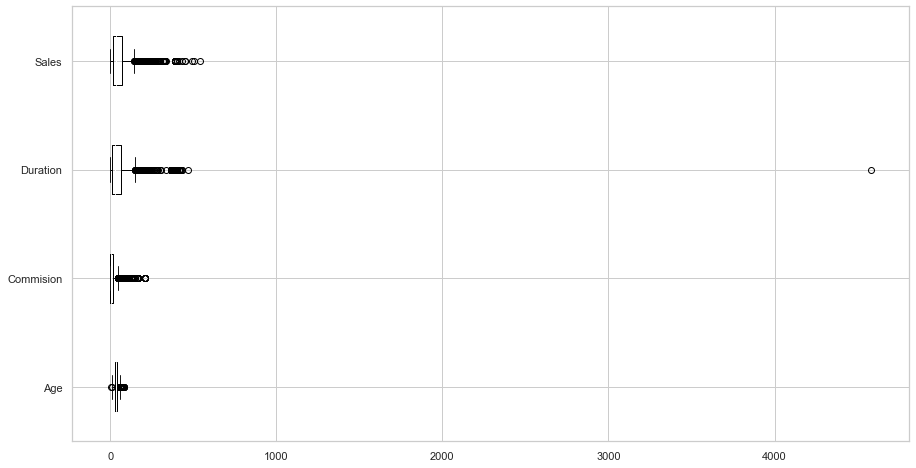

In [78]:
# Checking for Outliers
plt.figure(figsize=(15,8))
DF2[["Age","Commision","Duration","Sales"]].boxplot(vert=0)

In [79]:
df_con = DF2.select_dtypes(["float64","int64"])
df_con.head()

,Age,Commision,Duration,Sales
0,48,0.70,7,2.51
1,36,0.00,34,20.00
2,39,5.94,3,9.90
3,36,0.00,4,26.00
4,33,6.30,53,18.00


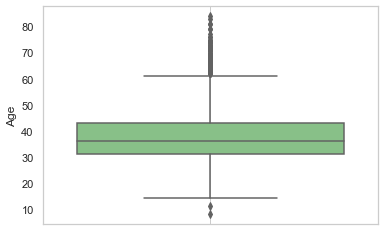

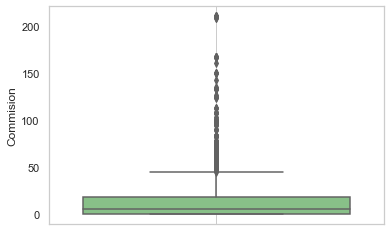

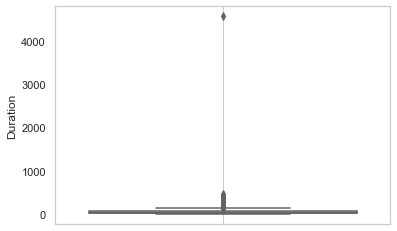

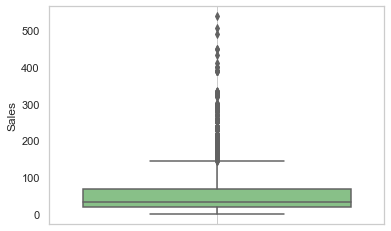

In [80]:
sns.set_palette("Accent")

df_con_col = df_con.columns

for i in df_con_col:
    sns.boxplot(y=df_con[i],data=df_con);
    plt.grid()
    plt.show()

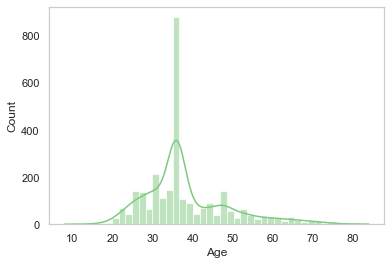

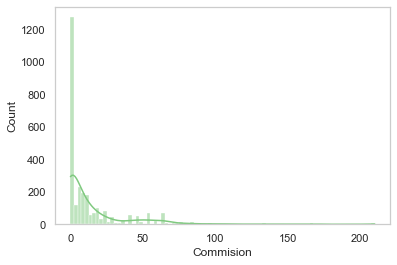

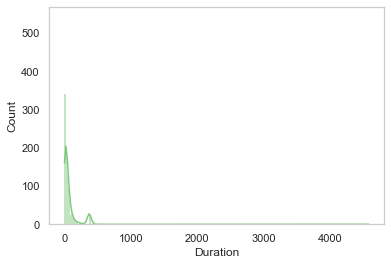

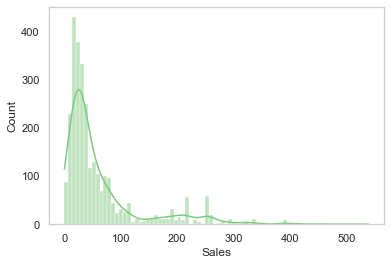

In [81]:
df_con_col = df_con.columns
for i in df_con_col:
    sns.histplot(DF2[i],kde=True);
    plt.grid()
    plt.show()

In [82]:
df_cat = DF2.select_dtypes(["object"])
df_cat.head()

,Agency_Code,Type,Claimed,Channel,Product Name,Destination
0,C2B,Airlines,No,Online,Customised Plan,ASIA
1,EPX,Travel Agency,No,Online,Customised Plan,ASIA
2,CWT,Travel Agency,No,Online,Customised Plan,Americas
3,EPX,Travel Agency,No,Online,Cancellation Plan,ASIA
4,JZI,Airlines,No,Online,Bronze Plan,ASIA


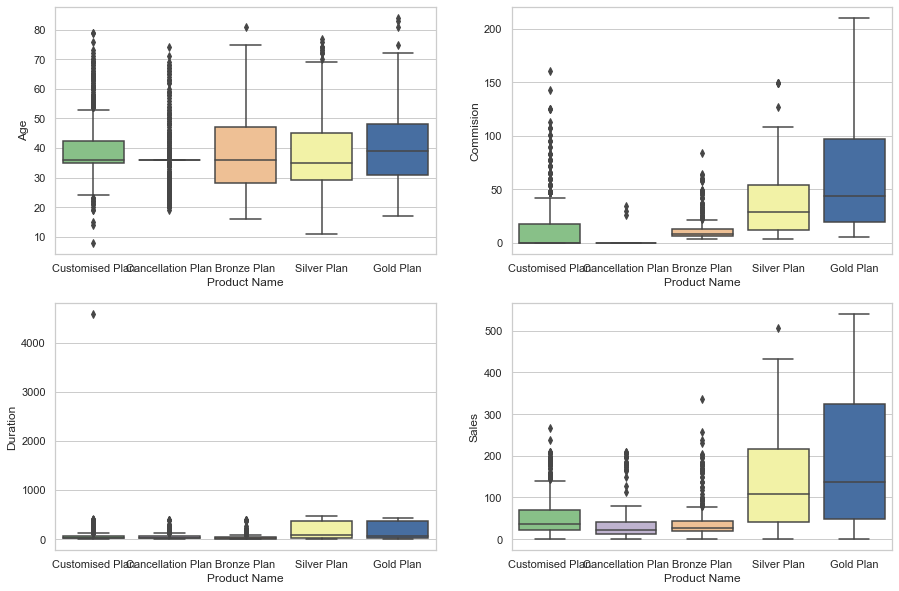

In [83]:
# BIVARIATE ANALYSIS
#product name vs continuous columns

fig,axes = plt.subplots(nrows = 2,ncols = 2)
fig.set_size_inches(15,10)
sns.boxplot(y="Age",x ="Product Name",data=DF2 ,ax=axes[0][0])
sns.boxplot(y="Commision",data=DF2,x ="Product Name",ax=axes[0][1])
sns.boxplot(y="Duration",data=DF2,x ="Product Name",ax=axes[1][0])
sns.boxplot(y="Sales",data=DF2,x ="Product Name",ax=axes[1][1])

plt.show()

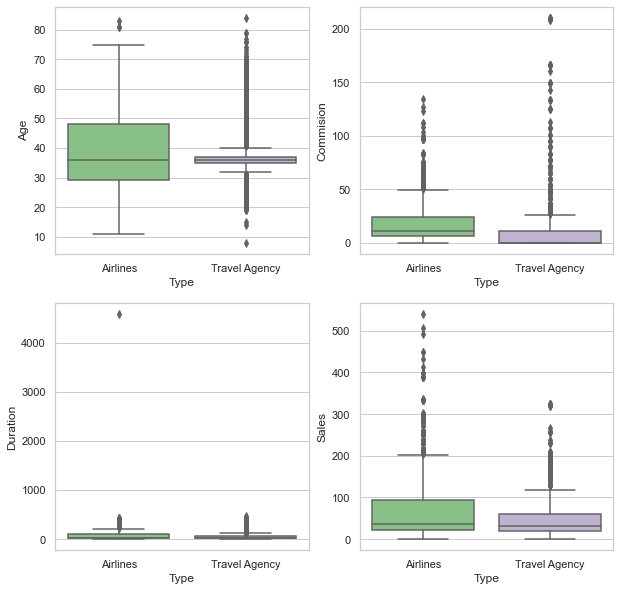

In [84]:
fig,axes = plt.subplots(nrows = 2,ncols = 2)
fig.set_size_inches(10,10)
sns.boxplot(y="Age",x ="Type",data=DF2 ,ax=axes[0][0])
sns.boxplot(y="Commision",data=DF2,x ="Type",ax=axes[0][1])
sns.boxplot(y="Duration",data=DF2,x ="Type",ax=axes[1][0])
sns.boxplot(y="Sales",data=DF2,x ="Type",ax=axes[1][1])
plt.show()

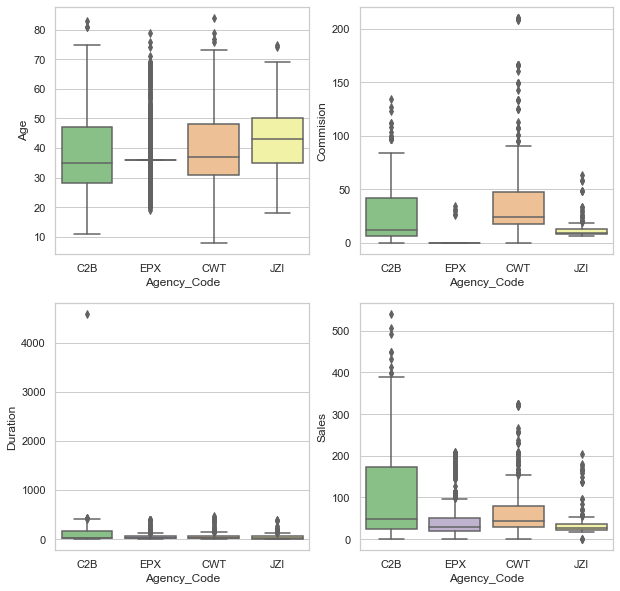

In [85]:
fig,axes = plt.subplots(nrows = 2,ncols = 2)
fig.set_size_inches(10,10)
sns.boxplot(y="Age",x ="Agency_Code",data=DF2 ,ax=axes[0][0])
sns.boxplot(y="Commision",data=DF2,x ="Agency_Code",ax=axes[0][1])
sns.boxplot(y="Duration",data=DF2,x ="Agency_Code",ax=axes[1][0])
sns.boxplot(y="Sales",data=DF2,x ="Agency_Code",ax=axes[1][1])
plt.show()

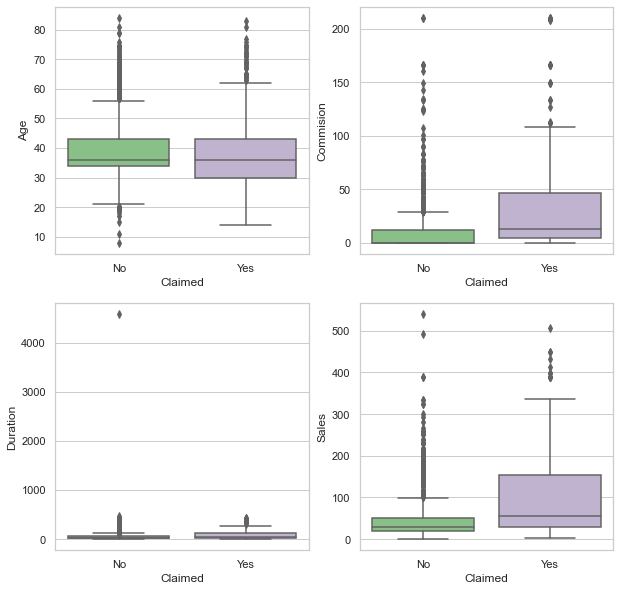

In [86]:
#For the numeric variables.
fig,axes = plt.subplots(nrows = 2,ncols = 2)
fig.set_size_inches(10,10)
sns.boxplot(y="Age",x ="Claimed",data=DF2 ,ax=axes[0][0])
sns.boxplot(y="Commision",data=DF2,x ="Claimed",ax=axes[0][1])
sns.boxplot(y="Duration",data=DF2,x ="Claimed",ax=axes[1][0])
sns.boxplot(y="Sales",data=DF2,x ="Claimed",ax=axes[1][1])
plt.show()

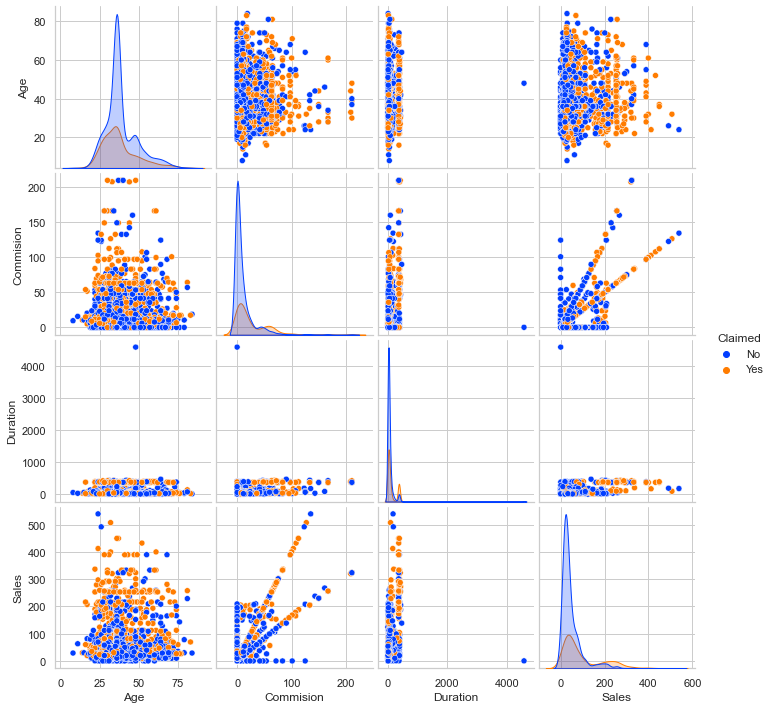

In [87]:
#MULTIVARIATE ANALYSIS
sns.pairplot(DF2,hue='Claimed',palette='bright')

<AxesSubplot:>

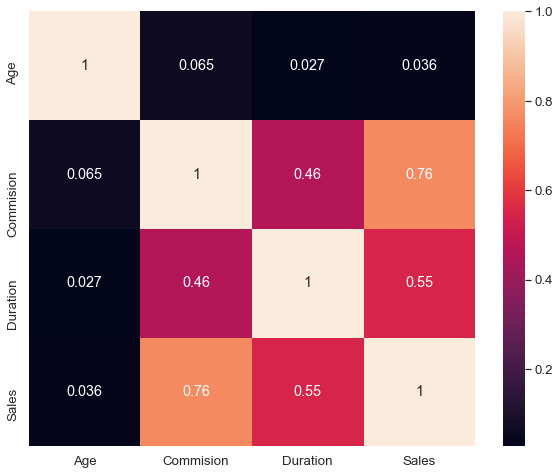

In [88]:
#construct heatmap with only continuous variables (coorelation heat map)
plt.figure(figsize=(10,8))
sns.set(font_scale=1.2)
sns.heatmap(DF2[["Age","Commision","Duration","Sales"]].corr(), annot=True)



2.2 Data Split: Split the data into test and train, build classification model CART, Random Forest, Artificial Neural Network 

CART MODEL

In [89]:
#converting the categorical into numeric data type

for feature in DF2: 
    if DF2[feature].dtype == 'object': 
        print('\n')
        print('feature:',feature)
        print(pd.Categorical(DF2[feature].unique()))
        print(pd.Categorical(DF2[feature].unique()).codes)
        DF2[feature] = pd.Categorical(DF2[feature]).codes



feature: Agency_Code
['C2B', 'EPX', 'CWT', 'JZI']
Categories (4, object): ['C2B', 'CWT', 'EPX', 'JZI']
[0 2 1 3]


feature: Type
['Airlines', 'Travel Agency']
Categories (2, object): ['Airlines', 'Travel Agency']
[0 1]


feature: Claimed
['No', 'Yes']
Categories (2, object): ['No', 'Yes']
[0 1]


feature: Channel
['Online', 'Offline']
Categories (2, object): ['Offline', 'Online']
[1 0]


feature: Product Name
['Customised Plan', 'Cancellation Plan', 'Bronze Plan', 'Silver Plan', 'Gold Plan']
Categories (5, object): ['Bronze Plan', 'Cancellation Plan', 'Customised Plan', 'Gold Plan', 'Silver Plan']
[2 1 0 4 3]


feature: Destination
['ASIA', 'Americas', 'EUROPE']
Categories (3, object): ['ASIA', 'Americas', 'EUROPE']
[0 1 2]


In [90]:
DF2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2861 entries, 0 to 2999
Data columns (total 10 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Age           2861 non-null   int64  
 1   Agency_Code   2861 non-null   int8   
 2   Type          2861 non-null   int8   
 3   Claimed       2861 non-null   int8   
 4   Commision     2861 non-null   float64
 5   Channel       2861 non-null   int8   
 6   Duration      2861 non-null   int64  
 7   Sales         2861 non-null   float64
 8   Product Name  2861 non-null   int8   
 9   Destination   2861 non-null   int8   
dtypes: float64(2), int64(2), int8(6)
memory usage: 193.1 KB


In [91]:
DF2.head()

,Age,Agency_Code,Type,Claimed,Commision,Channel,Duration,Sales,Product Name,Destination
0,48,0,0,0,0.70,1,7,2.51,2,0
1,36,2,1,0,0.00,1,34,20.00,2,0
2,39,1,1,0,5.94,1,3,9.90,2,1
3,36,2,1,0,0.00,1,4,26.00,1,0
4,33,3,0,0,6.30,1,53,18.00,0,0


In [92]:
# Building Cart Decision tree model
# DATA SPLIT AND MODEL BUILDING
# 70 & 30 proportion for training and test dataset respectively


In [93]:
x = DF2.drop("Claimed", axis=1)

y = DF2.pop("Claimed")

In [94]:
#decision tree classifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neural_network import MLPClassifier

CART

In [95]:
 #splitting data into training and test set for independent attributes
from sklearn.model_selection import train_test_split

x_train, x_test, train_labels, test_labels = train_test_split(x, y, test_size=.30, random_state=123)

In [96]:
# Checking dimensions on the train and test data
print('Train dataset: ',x_train.shape)
print('Test dataset: ',x_test.shape)
print('Train labels: ',train_labels.shape)
print('Test labels: ',test_labels.shape)

Train dataset:  (2002, 9)
Test dataset:  (859, 9)
Train labels:  (2002,)
Test labels:  (859,)


Decision Tree Classifier

In [97]:
from sklearn.tree import DecisionTreeClassifier

In [141]:
dt_model = DecisionTreeClassifier(criterion = 'gini' )

In [142]:
dt_model.fit(x_train,train_labels)


NameError: name 'y_train' is not defined

In [100]:
from sklearn import tree

train_char_label = ['No', 'Yes']
INS_Tree_File = open('insurance_tree.dot','w')
dot_data = tree.export_graphviz(dt_model, out_file=INS_Tree_File, feature_names = list(x_train), class_names = list(train_char_label))
INS_Tree_File.close()

In [101]:
from sklearn.model_selection import GridSearchCV

In [137]:
param_grid = {
    'max_depth': [ 5, 6, 7 ],
    'min_samples_leaf': [ 6, 7, 8 ],
    'min_samples_split': [ 150, 200, 250 ]
}

dt_model = DecisionTreeClassifier()

grid_search = GridSearchCV(estimator = dt_model, param_grid = param_grid, cv = 10)

In [139]:
grid_search.fit(x_train, train_labels)

GridSearchCV(cv=10, estimator=DecisionTreeClassifier(),
             param_grid={'max_depth': [5, 6, 7], 'min_samples_leaf': [6, 7, 8],
                         'min_samples_split': [150, 200, 250]})

In [104]:
grid_search.best_params_

{'max_depth': 6, 'min_samples_leaf': 6, 'min_samples_split': 200}

In [105]:
best_grid = grid_search.best_estimator_

In [106]:
train_char_label = ['No', 'Yes']
INS_Tree_File = open('insurance_tree_best_grid.dot','w')
dot_data = tree.export_graphviz(best_grid, out_file=INS_Tree_File, feature_names = list(x_train), class_names = list(train_char_label))
INS_Tree_File.close()

In [107]:
print (pd.DataFrame(best_grid.feature_importances_, columns = ["Importance"], index = x_train.columns).sort_values('Importance',ascending=False))

              Importance
Agency_Code     0.562725
Sales           0.208162
Product Name    0.119995
Duration        0.037732
Age             0.033579
Commision       0.029864
Destination     0.007943
Type            0.000000
Channel         0.000000


In [108]:
ytrain_predict = best_grid.predict(x_train)
ytest_predict = best_grid.predict(x_test)

In [109]:
from sklearn.metrics import classification_report, confusion_matrix

In [110]:
def draw_cm(actual, predicted):
    cm = confusion_matrix(actual, predicted, [1,0])
    ax = sns.heatmap(cm, cmap = 'icefire', annot=True, fmt='.0f',annot_kws={"fontsize":14},
              xticklabels = ["No", "Yes"],
              yticklabels = ["No", "Yes"],
                    cbar = False)
    bottom, top = ax.get_ylim()
    ax.set_ylim (bottom + 0.5, top - 0.5)
    plt.ylabel('Actual')
    plt.xlabel('Predicted')
    plt.show()

C:\Users\rmand\anaconda3\lib\site-packages\sklearn\utils\validation.py:70: FutureWarning: Pass labels=[1, 0] as keyword args. From version 1.0 (renaming of 0.25) passing these as positional arguments will result in an error
  warnings.warn(f"Pass {args_msg} as keyword args. From version "


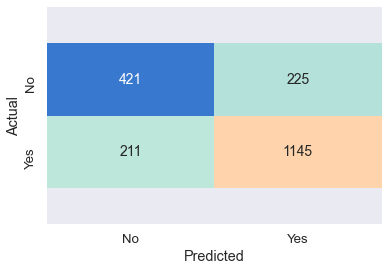

In [111]:
draw_cm(train_labels,ytrain_predict)

In [112]:
#Train Data Accuracy
cart_train_accu = best_grid.score(x_train,train_labels) 
cart_train_accu

0.7822177822177823

In [113]:
print(classification_report(train_labels,ytrain_predict))

              precision    recall  f1-score   support

           0       0.84      0.84      0.84      1356
           1       0.67      0.65      0.66       646

    accuracy                           0.78      2002
   macro avg       0.75      0.75      0.75      2002
weighted avg       0.78      0.78      0.78      2002



In [114]:
cart_metrics=classification_report(train_labels, ytrain_predict,output_dict=True)
cr_df=pd.DataFrame(cart_metrics).transpose()
cart_train_precision=round(cr_df.loc["1"][0],2)
cart_train_recall=round(cr_df.loc["1"][1],2)
cart_train_f1=round(cr_df.loc["1"][2],2)
print ('cart_train_precision ',cart_train_precision)
print ('cart_train_recall ',cart_train_recall)
print ('cart_train_f1 ',cart_train_f1)

cart_train_precision  0.67
cart_train_recall  0.65
cart_train_f1  0.66


In [115]:
cr_df

,precision,recall,f1-score,support
0,0.835766,0.844395,0.840059,1356.000000
1,0.666139,0.651703,0.658842,646.000000
accuracy,0.782218,0.782218,0.782218,0.782218
macro avg,0.750953,0.748049,0.749450,2002.000000
weighted avg,0.781032,0.782218,0.781584,2002.000000


C:\Users\rmand\anaconda3\lib\site-packages\sklearn\utils\validation.py:70: FutureWarning: Pass labels=[1, 0] as keyword args. From version 1.0 (renaming of 0.25) passing these as positional arguments will result in an error
  warnings.warn(f"Pass {args_msg} as keyword args. From version "


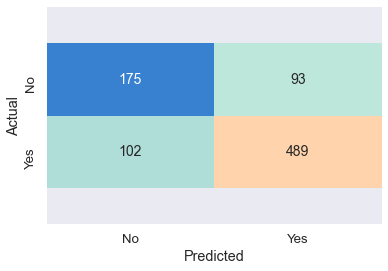

In [116]:
draw_cm(test_labels,ytest_predict)

In [117]:
#Test Data Accuracy
cart_test_accu = best_grid.score(x_test,test_labels) 
cart_test_accu

0.7729918509895227

In [118]:
print(classification_report(test_labels,ytest_predict))

              precision    recall  f1-score   support

           0       0.84      0.83      0.83       591
           1       0.63      0.65      0.64       268

    accuracy                           0.77       859
   macro avg       0.74      0.74      0.74       859
weighted avg       0.78      0.77      0.77       859



In [119]:
cart_metrics=classification_report(test_labels, ytest_predict,output_dict=True)
cdf=pd.DataFrame(cart_metrics).transpose()
cart_test_precision=round(cdf.loc["1"][0],2)
cart_test_recall=round(cdf.loc["1"][1],2)
cart_test_f1=round(cdf.loc["1"][2],2)
print ('cart_train_precision ',cart_test_precision)
print ('cart_train_recall ',cart_test_recall)
print ('cart_train_f1 ',cart_test_f1)

cart_train_precision  0.63
cart_train_recall  0.65
cart_train_f1  0.64


In [120]:
cdf

,precision,recall,f1-score,support
0,0.840206,0.827411,0.833760,591.000000
1,0.631769,0.652985,0.642202,268.000000
accuracy,0.772992,0.772992,0.772992,0.772992
macro avg,0.735988,0.740198,0.737981,859.000000
weighted avg,0.775176,0.772992,0.773995,859.000000


# AUC and ROC for the training data

AUC: 0.830


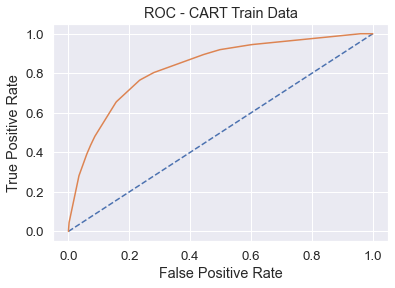

In [121]:
# predict probabilities
probs = best_grid.predict_proba(x_train)
# keep probabilities for the positive outcome only
probs = probs[:, 1]
# calculate AUC
from sklearn.metrics import roc_auc_score
cart_train_auc = roc_auc_score(train_labels, probs)
#auc
print('AUC: %.3f' % cart_train_auc)
# calculate roc curve
from sklearn.metrics import roc_curve
cart_train_fpr, cart_train_tpr, thresholds = roc_curve(train_labels, probs)
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(cart_train_fpr, cart_train_tpr)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC - CART Train Data')
# show the plot
plt.show()

# AUC and ROC for the test data

AUC: 0.785


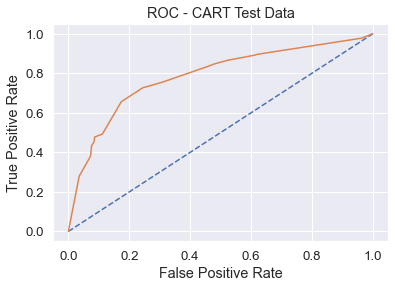

In [122]:
# # predict probabilities
probs = best_grid.predict_proba(x_test)
# keep probabilities for the positive outcome only
probs = probs[:, 1]
# calculate AUC
from sklearn.metrics import roc_auc_score
cart_test_auc = roc_auc_score(test_labels, probs)
print('AUC: %.3f' % cart_test_auc)
# calculate roc curve
from sklearn.metrics import roc_curve
cart_test_fpr, cart_test_tpr, thresholds = roc_curve(test_labels, probs)
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(cart_test_fpr, cart_test_tpr)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC - CART Test Data')
# show the plot
plt.show()


# Random Forest


In [150]:
rfcl = RandomForestClassifier(n_estimators = 501)
rfcl = rfcl.fit(x_train, train_labels)

In [151]:
from sklearn.model_selection import GridSearchCV

param_grid = {
    'max_depth': [7, 10],
    'max_features': [5,9],
    'min_samples_leaf': [50, 100],
    'min_samples_split': [150, 300],
    'n_estimators': [301,501]
}

rfcl = RandomForestClassifier()

grid_search = GridSearchCV(estimator = rfcl, param_grid = param_grid, cv = 3)

In [153]:
grid_search.fit(x_train, train_labels)

GridSearchCV(cv=3, estimator=RandomForestClassifier(),
             param_grid={'max_depth': [7, 10], 'max_features': [5, 9],
                         'min_samples_leaf': [50, 100],
                         'min_samples_split': [150, 300],
                         'n_estimators': [301, 501]})

In [154]:
grid_search.best_params_

{'max_depth': 7,
 'max_features': 5,
 'min_samples_leaf': 50,
 'min_samples_split': 150,
 'n_estimators': 301}

In [ ]:
ytrain_predict = best_grid.predict(X_train)
ytest_predict = best_grid.predict(X_test)

In [ ]:
from sklearn.metrics import confusion_matrix,classification_report

In [ ]:
confusion_matrix(train_labels,ytrain_predict)

In [ ]:
confusion_matrix(test_labels,ytest_predict)

In [ ]:
print(classification_report(train_labels,ytrain_predict))

In [ ]:
print(classification_report(test_labels,ytest_predict))

In [ ]:
# AUC and ROC for the training data

# predict probabilities
probs = best_grid.predict_proba(X_train)
# keep probabilities for the positive outcome only
probs = probs[:, 1]
# calculate AUC
from sklearn.metrics import roc_auc_score
auc = roc_auc_score(train_labels, probs)
print('AUC: %.3f' % auc)
# calculate roc curve
from sklearn.metrics import roc_curve
fpr, tpr, thresholds = roc_curve(train_labels, probs)
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(fpr, tpr, marker='.')
# show the plot
plt.show()

In [ ]:
# AUC and ROC for the test data


# predict probabilities
probs = best_grid.predict_proba(X_test)
# keep probabilities for the positive outcome only
probs = probs[:, 1]
# calculate AUC
from sklearn.metrics import roc_auc_score
auc = roc_auc_score(test_labels, probs)
print('AUC: %.3f' % auc)
# calculate roc curve
from sklearn.metrics import roc_curve
fpr, tpr, thresholds = roc_curve(test_labels, probs)
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(fpr, tpr, marker='.')
# show the plot
plt.show()

In [ ]:
# Variable Importance
print (pd.DataFrame(best_grid.feature_importances_, 
                    columns = ["Imp"], 
                    index = X_train.columns).sort_values('Imp',ascending=False))

In [ ]:
from sklearn.preprocessing import StandardScaler

In [ ]:
sc = StandardScaler()

In [ ]:
X_train = sc.fit_transform(X_train)

In [ ]:
X_train

In [ ]:
X_test = sc.transform(X_test)

In [ ]:
X_test

In [ ]:
clf = MLPClassifier(hidden_layer_sizes=200, max_iter=2500,
                     solver='sgd', verbose=True,  random_state=5,tol=0.01)

# MLPClassifier(hidden_layer_sizes=200, max_iter=2500, random_state=1, tol=0.01)

In [ ]:
clf.fit(X_train, train_labels)
y_pred = clf.predict(X_test)

In [ ]:
cm = confusion_matrix(test_labels, y_pred)
cm

In [ ]:
# X_train, X_test, train_labels, test_labels

pred2 = clf.predict(X_train)
confusion_matrix(train_labels,pred2)

In [ ]:
print(classification_report(test_labels, y_pred))

In [ ]:
print(classification_report(train_labels,pred2))

In [ ]:
# AUC and ROC for the training data

# predict probabilities
probs = clf.predict_proba(X_train)
# keep probabilities for the positive outcome only
probs = probs[:, 1]
# calculate AUC
from sklearn.metrics import roc_auc_score
auc = roc_auc_score(train_labels, probs)
print('AUC: %.3f' % auc)
# calculate roc curve
from sklearn.metrics import roc_curve
fpr, tpr, thresholds = roc_curve(train_labels, probs)
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(fpr, tpr, marker='.')
# show the plot
plt.show()

In [ ]:
# AUC and ROC for the test data

# predict probabilities
probs = clf.predict_proba(X_test)
# keep probabilities for the positive outcome only
probs = probs[:, 1]
# calculate AUC
from sklearn.metrics import roc_auc_score
auc = roc_auc_score(test_labels, probs)
print('AUC: %.3f' % auc)
# calculate roc curve
from sklearn.metrics import roc_curve
fpr, tpr, thresholds = roc_curve(test_labels, probs)
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(fpr, tpr, marker='.')
# show the plot
plt.show()

In [ ]:
plt.plot([0, 1], [0, 1], linestyle='--')
plt.plot(fpr,tpr,color='red',label="CART")
plt.plot(fpr,tpr,color='green',label="RF")
plt.plot(fpr,tpr,color='black',label="NN")
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC')
plt.legend(bbox_to_anchor=(0., 1.02, 1., .102), loc='lower right')